<a href="https://colab.research.google.com/github/anjitha30/British-Airways-Customer-Feedback-Analysis/blob/main/Predictive_modeling_of_customer_bookings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Predictive modeling of customer bookings

We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/content/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

# **Explore the Dataset**

* **Understand the columns**: Identify the meaning of each column (e.g., num_passengers, sales_channel, trip_type, etc.).

* **Check for missing values**: Ensure there are no missing values in the dataset.

* **Analyze the target variable**: The target variable is booking_complete (1 if the booking was completed, 0 otherwise). Check the distribution of this variable.

booking_complete
0    42522
1     7478
Name: count, dtype: int64


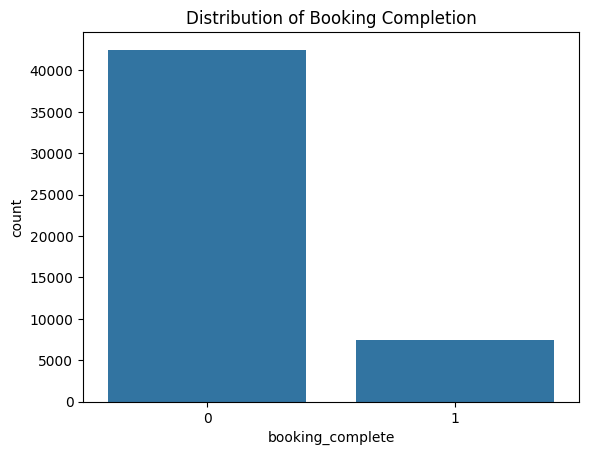

In [8]:
# Check the distribution of the target variable
print(df['booking_complete'].value_counts())

# Visualize the distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='booking_complete', data=df)
plt.title('Distribution of Booking Completion')
plt.show()

# **Feature Engineering**

* **Create new features**:
  For example, you could
create a feature for the total number of services requested (wants_extra_baggage, wants_preferred_seat, wants_in_flight_meals).

* **Encode categorical variables:**
  Convert categorical variables like sales_channel, trip_type, and flight_day into numerical values using one-hot encoding or label encoding.

In [9]:
# Create a new feature for total services requested
df['total_services'] = df['wants_extra_baggage'] + df['wants_preferred_seat'] + df['wants_in_flight_meals']

# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['sales_channel', 'trip_type', 'flight_day'], drop_first=True)

# Check the updated DataFrame
print(df.head())

   num_passengers  purchase_lead  length_of_stay  flight_hour   route  \
0               2            262              19            7  AKLDEL   
1               1            112              20            3  AKLDEL   
2               2            243              22           17  AKLDEL   
3               1             96              31            4  AKLDEL   
4               2             68              22           15  AKLDEL   

  booking_origin  wants_extra_baggage  wants_preferred_seat  \
0    New Zealand                    1                     0   
1    New Zealand                    0                     0   
2          India                    1                     1   
3    New Zealand                    0                     0   
4          India                    1                     0   

   wants_in_flight_meals  flight_duration  ...  total_services  \
0                      0             5.52  ...               1   
1                      0             5.52  ...    

In [10]:
from sklearn.preprocessing import LabelEncoder

# Identify and encode remaining categorical columns
categorical_cols = ['route', 'booking_origin']  # Add other potential categorical columns

for col in categorical_cols:
    # Initialize LabelEncoder
    encoder = LabelEncoder()

    # Fit and transform the data
    df[col] = encoder.fit_transform(df[col])

# Split the Data
Split the dataset into training and testing sets.

In [11]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop('booking_complete', axis=1)
y = df['booking_complete']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Machine Learning Model
**Choose a Model**

Use a RandomForestClassifier, as it allows you to easily interpret feature importance.

In [12]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Feature Importance
Extract and visualize the feature importance to understand which variables contribute most to the model's predictions.

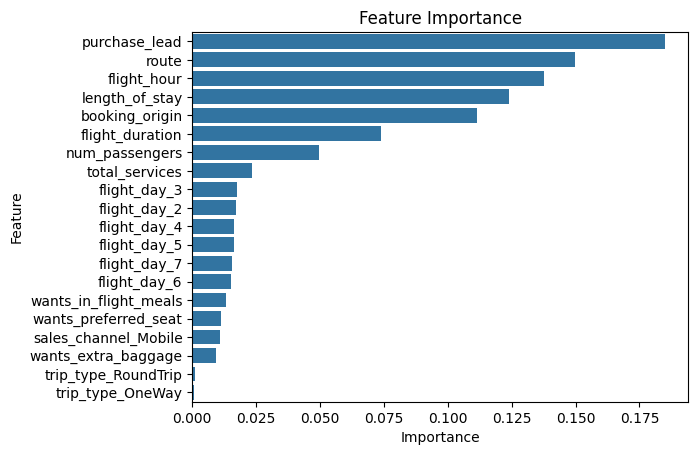

In [13]:
# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importance
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

# Evaluate the Model
 **Cross-Validation**

Perform cross-validation to evaluate the model's performance.

In [14]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation scores
print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean()}')

Cross-Validation Accuracy Scores: [0.84875  0.850625 0.85175  0.848125 0.854625]
Mean Cross-Validation Accuracy: 0.850775


# Evaluation Metrics
Evaluate the model using metrics like accuracy, precision, recall, and F1-score.

Accuracy: 0.8566
Precision: 0.5871212121212122
Recall: 0.10472972972972973
F1-Score: 0.17775229357798164


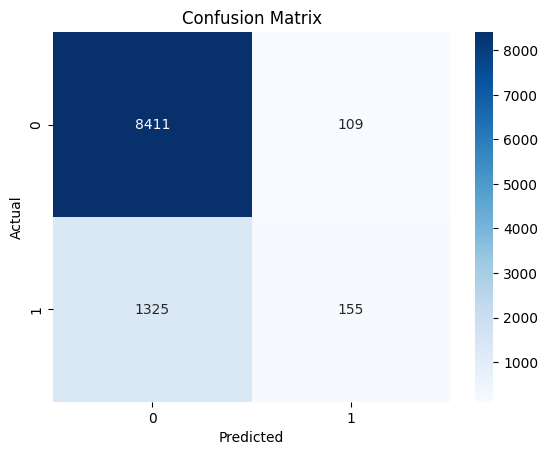

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Summary

* **Accuracy is good (~85%)**, but it’s not sufficient for imbalanced datasets.

* **Precision, recall, and F1-score are low**, indicating that the model is not performing well for the "completed bookings" class.

* To improve the model:

  * Handle imbalanced data using oversampling, undersampling, or class weighting.

  * Adjust the classification threshold.

  * Try other algorithms like XGBoost or Logistic Regression.

  * Use AUC-PR as the evaluation metric instead of accuracy.